In [1]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

In [34]:
base = './data/twitter_social_konect_uni_koblenz_de/' 
filename = 'out.munmun_twitter_social'
full_path = base + filename
cut_off = 100
with open(full_path, 'r') as file:
    text = file.read()
    substring = '\n'.join(text.split('\n')[:cut_off])

subset_filename = full_path + 'subset_twitter_data'
with open(subset_filename, 'w') as file:
    file.write(substring)

In [35]:
T = nx.read_adjlist(full_path, comments="%")
T_sub = nx.read_adjlist(subset_filename, create_using=nx.DiGraph, comments='%')

In [10]:
S = nx.read_adjlist(path, create_using=nx.DiGraph, comments="%")

/Volumes/Ubuntu/.miniconda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Volumes/Ubuntu/.miniconda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


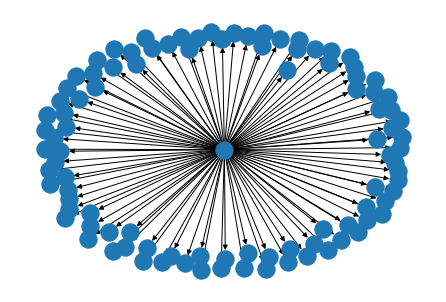

In [36]:
# Draw the graph to screen
nx.draw(T_sub)
plt.show()

In [38]:
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < date(2010, 1, 1)]


KeyError: 'occupation'

In [ ]:
# Set the weight of the edge
T.edge[1][10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u, v]:
    
        # Set the weight to 1.1
        T.edge[u][v]['weight'] = 1.1

In [ ]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []
    
    # Iterate over all the edges of G
    for u, v in G.edges():
    
        # Check if node u and node v are the same
        if u == v:
        
            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)
            
    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))

In [ ]:
# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(T)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

# Convert T to a matrix format: A
A = nx.to_numpy_matrix(T)

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the category metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(T)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()


In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(T)

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

# Create the customized ArcPlot object: a2
a2 = ArcPlot(T, node_order='category', node_color='category')

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show()

In [ ]:
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()
    
    # Iterate over all nodes in G
    for n in G.nodes():
    
        # Check if the number of neighbors of n matches m
        if len(G.neighbors(n)) == m:
        
            # Add the node n to the set
            nodes.add(n)
            
    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T, 6)
print(six_nbrs)


In [ ]:
# Compute the degree of every node: degrees
degrees = [len(T.neighbors(n)) for n in T.nodes()]

# Print the degrees
print(degrees)


In [ ]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T)

# Plot a histogram of the degree centrality distribution of the graph
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show()

In [ ]:
# Define path_exists()
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    
    # Initialize the queue of cells to visit with the first node: queue
    queue = [node1]  
    
    # Iterate over the nodes in the queue
    for node in queue:
    
        # Get neighbors of the node
        neighbors = G.neighbors(node)
        
        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break


In [ ]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]
    
    for node in queue:  
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            # Add current node to visited nodes
            visited_nodes.add(node)
            
            # Add neighbors of current node that have not yet been visited
            queue.extend([n for n in neighbors if n not in visited_nodes])

In [ ]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]
    
    for node in queue:  
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])
        
        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))
            
            # Place the appropriate return statement
            return False

In [ ]:
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(T)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(T)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()), list(deg_cen.values()))

# Display the plot
plt.show()

In [ ]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)
    
    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))
    
    nodes = set()
    
    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():
    
        # Check if the current value has the maximum degree centrality
        if v == max_dc:
        
            # Add the current node to the set of nodes
            nodes.add(k)
            
    return nodes
    
# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(T)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(T)[node] == max(nx.degree_centrality(T).values())

In [ ]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)
    
    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))
    
    nodes = set()
    
    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():
    
        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:
        
            # Add the current node to the set of nodes
            nodes.add(k)
            
    return nodes

# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(T)

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(T)[node] == max(nx.betweenness_centrality(T).values())

In [ ]:
from itertools import combinations

# Define is_in_triangle() 
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not. 
    
    Returns a boolean.
    """
    in_triangle = False
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

In [ ]:
from itertools import combinations

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):
        
            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)
            
            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)
            
    return triangle_nodes
    
# Write the assertion statement
assert len(nodes_in_triangle(T, 1)) == 35

In [ ]:
from itertools import combinations

# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):
        
            in_open_triangle = True
            
            break
            
    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in T.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(T, n):
    
        # Increment num_open_triangles
        num_open_triangles += 1
        
print(num_open_triangles)


In [ ]:
# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

# Check that there are 33 maximal cliques of size 3 in the graph T
assert len(maximal_cliques(T, 3)) == 33

In [ ]:
nodes_of_interest = [29, 38, 42]  # provided.

# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []
    
    # Iterate over the nodes of interest
    for n in nodes_of_interest:
    
        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)
        
        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):
        
            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)
            
    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(T, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw)
plt.show()

In [ ]:
# Extract the nodes of interest: nodes
nodes = [n for n, d in T.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = T.neighbors(n)
    
    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
T_sub = T.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub)
plt.show()

## CASE STUDY!!!!

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx 

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx 

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(G).values()))
plt.show()

In [ ]:
# Import necessary modules
from nxviz import MatrixPlot
import matplotlib.pyplot as plt 

# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(graph=largest_ccs, node_grouping='grouping')

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

In [ ]:
# Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)
    
# Create the ArcPlot object: a
a = ArcPlot(graph=G, node_order='degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

In [ ]:
# Import necessary modules
from nxviz import CircosPlot
import matplotlib.pyplot as plt 
 
# Iterate over all the nodes, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)

# Create the CircosPlot object: c
c = CircosPlot(G, node_order='degree', node_grouping='grouping', node_color='grouping')

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

In [ ]:
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(G)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))

In [ ]:
# Import necessary modules
import networkx as nx
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

In [ ]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)


In [ ]:
# Import necessary modules
from nxviz import ArcPlot
import matplotlib.pyplot as plt
 
# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique)

# Go out 1 degree of separation
for node in G_lmc.nodes():
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(G.neighbors(node)), G.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]
        
# Create the ArcPlot object: a
a = ArcPlot(G_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

In [ ]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):
        
            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)
